<a href="https://colab.research.google.com/github/tuomaseerola/emr/blob/master/Chapter6.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 6 Code (Using R)

A Jupyter notebook with **code examples in R** for _Chapter 6_ of _Routlegde_ book titled **[How to Conduct Empirical Music Research](https://github.com/tuomaseerola/emr)** by [Tuomas Eerola](https://www.durham.ac.uk/staff/tuomas-eerola/), [Music and Science Lab]() at [Durham University](https://www.durham.ac.uk) and [Music and Science Lab](https://musicscience.net) scheduled to be published in 2023.

To run the code in your browser, open the file in Colab (click the icon "Open in Colab"). Alternatively, you can download the notebook and run it locally.

This notebook demonstrates how to use R.

File `Chapter6.1.ipynb` | Version `29/9/2022` | [Back to Index](https://github.com/tuomaseerola/emr)

---

# Using R and RStudio

There are plenty of tools for data analysis and statistics available. I will only consider those that are open source and free to use as this is the only way to guarantee that people are able to access the tools. Sadly some fine tools such as _SPSS_, _JMP_, _Minitab_, _SAS_, or _Stata_ don't fulfil these principles. _R_ and _RStudio_, _JASP_, _Jamovi_ and _Python_ (made better with libraries such as _scipy_) and some others are free and open source software that have become common research tools in empirical sciences. In addition to being free and easily available, they have excellent capacities to share the analysis workflow and some have tools to ensure replicability over years and different versions. I will focus on _R_ in the statistical analysis and explain why I think this is a good option for analysis empirical data.

<img src="https://d33wubrfki0l68.cloudfront.net/1ac3f0e3753f18c7e2a8893957d1841fba1e3d08/48a33/wp-content/uploads/2018/10/rstudio-logo-flat.png" width="400">

## Why use R?

R is a versatile environment for analysing any data. It is interactive and suits well for casual exploration of data that comes in many different forms (numbers, text strings) and different shapes (long and wide data). What is even more important in R is that it is fundamentally based on scripts that serve as a blueprint of the analysis you have done and allows you, or anyone else, to replicate your analyses simply by running the same script. R is also:

1. Free and open source.
2. It works well on all operating systems: Windows, Mac Os, UNIX/Linux.
3. the Community of R users is broad and active and for this reason the resources for learning and asking questions are impressive and well-developed (see Appendix).
4. It already has several music-specific tools (e.g., `incon`,`gm`,`hrep` libraries) and datasets (`MusicScienceData`).
5. It is excellent for any statistical analysis.

Here is a quick tutorial for using R, but I would also recommend [Getting Started with R](https://support.posit.co/hc/en-us/articles/201141096-Getting-Started-with-R) and [The Basics](https://posit.cloud/learn/primers/1) guides by the company who brings us RStudio ([Posit](https://posit.co/)).



### Nuts and bolts of R

The basic interface in R is called _R console_ that will carry out commands as you type them. There are several ways to gain access to an R console. One way is to simply start R on your computer. The console looks something like this:

![](images/Screenshot0.png)

As an easy example, try using the console in _R_ to calculate the duration in seconds of an eight note (or a quaver in the U.K.) in common time signature (4/4) when the tempo is quarter note = 120 beats per minute (BPM):

In [1]:
0.5 * (60 / 120)

[1] 0.25

The code boxes show R code typed into the R console. Anything followed by hashtag (#) is a comment and will not be interpreted by _R_. Here we see that one eight note is 0.25 seconds (or 250 ms if you want) in this tempo. We got this by remembering that one quarter note lasts for 60 / tempo in BPM seconds. And since eighth note is a half of a quarter note, we expressed this as 0.5 and multiplied (* ) this with the tempo expression (60/120). You would get the same result with `1/2 * 60/120`. Or you could define the duration and tempo as an equation:

In [2]:
note <- 0.5
tempo <- 120
dur_in_seconds <- note * 60 / tempo  # Calculate
print(dur_in_seconds * 1000)   # Convert to milliseconds

[1] 250


This example demonstrates that there are several ways of doing calculations in R. In the last example we tried to be clear about the operations and defined variables (`note` and `tempo`) and used them to calculate the duration of the note and finally to transform the value into milliseconds.

### RStudio, scripts and the whole development environment

_RStudio_ is a sleek and interactive _integrated development environment_ (IDE) that offers a number of great features to use R efficiently as it offers the console, and panes for folders, help files, an index of what it is the memory, and a separate window for plots.

![](images/Screenshot2.png)

There are three main panes in RStudio. The left pane shows the R console. On the right, the top pane includes tabs such as  _Environment_ and _History_, while the bottom pane shows five tabs: _File_, _Plots_, _Packages_, _Help_, and _Viewer_.

#### Scripts

Scripts are a collection of commands that can be edited with a text editor and executed in R.

To start a new script, you can click on _File_, then _New File_, then _R Script_. This starts a new pane on the left and it is here where you can start writing your script. This will contain your analysis. By documenting the analysis in the script, you, or anyone else, can replicate the steps in the script very easily and get the same results afterwards just by running the script.

#### Running commands while editing scripts

_RStudio_ helps to make the code more readable and easy to use by making different parts of the code in different colour and the indentation is automatically modified as you write the code. It will also close the parenthesis and suggest the variable names as you go along, and warn if a line of code contains an error. If we look at our new script, we first need to give it a name. A good practice is to name scripts in a descriptive fashion, use lower case letters, avoid spaces, only to use hyphens to separate words, and then followed by the suffix `.R`. We will call this script `code6.1.R`. This one will grab data from a published dataset of emotions expressed by film soundtracks and plot the rated mean valence and energy of each track.

See [Chapter7.R](https://tuomaseerola.github.io/emr/Chapter7.ipynb) R code at
[https://tuomaseerola.github.io/emr/](https://tuomaseerola.github.io/emr/) site.


Skipping install of 'MusicScienceData' from a github remote, the SHA1 (9f292fbe) has not changed since last install.
  Use `force = TRUE` to force installation



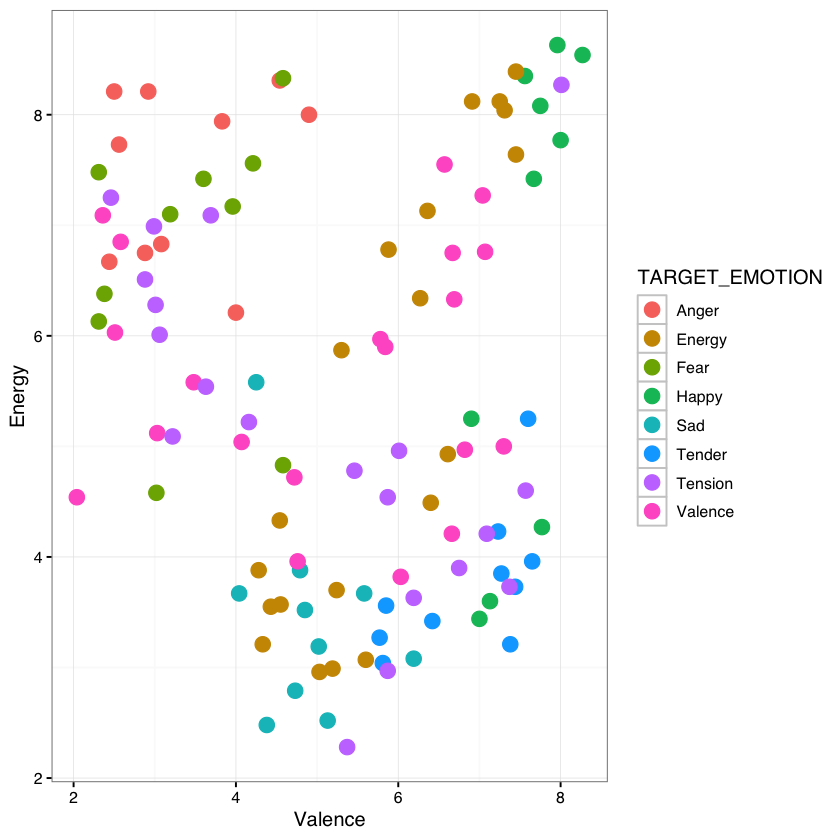

In [4]:
# code6.1.R
library(devtools)                       # add libraries from github
devtools::install_github("tuomaseerola/MusicScienceData")
library(MusicScienceData)               # loads library w data
library(ggplot2)                        # loads library
ggplot(MusicScienceData::soundtrack,    # defines the data
       aes(x=Valence,
           y=Energy,
           colour=TARGET_EMOTION))+     # variables
  geom_point(size=4)+                   # plots points
  theme_MusicScience()                  # applies style

Let's review this script. The first four lines of code in an R script are used to load the libraries that are needed. Here we load the data from `soundtrack` study, which is part of the `MusicScienceData` library. As an example, we will make a graph showing the position of 110 music excerpts in terms of their rated Valence and Energy. Once you have copied or typed the code above, you can run it by _executing_ the code by clicking on the _Run_ button on the upper right side of the editing pane.

Once you run the code, you will see it appear in the R console and, in this case, the generated plot appears in the plots console. The plot console has a useful interface that permits you to click back and forward across different plots, zoom in to the plot, or save the plots as files. I recommend learning to save the plots as graphics directly in the script so that it is easier to control their size (width and height, and resolution) and type (pdf, tiff, or png), and to replicate the identical plots afterwards.

![](images/Screenshot3.png)

To run one line at a time instead of the entire script, you can use _Control-Enter_ on Windows and _command-return_ on the Mac Os.

### Installing R packages
R has thousands of libraries available that offer data, libraries and functions. Not everybody needs all these functionalities, so R offers these as _packages_ that are easy to install within R. We will need a few of these so let's see how this works.

In RStudio, the _Tools_ tab contains an option to install packages. We can load a package into our R sessions using the `library` function:

In [ ]:
library(ggplot2)

If this command gives you an error, you probably do not have this fabulous plotting library installed in your R yet. This can be fixed by typing:

In [ ]:
install.packages("ggplot2")

After installation, you still need to make the library active in your session by invoking the `library` command described earlier. Different examples in this book will utilise different libraries. We only install the libraries once, because they remain installed and only need to be loaded with the `library` command.

The library where many examples come from, `MusicScienceData`, needs to be installed with the following code. This is because I have only released that library at Github for easier development, and R is not able to find it unless you have this extra package called `devtools` installed.

In [ ]:
install.packages("devtools") # add libraries from github
devtools::install_github("tuomaseerola/MusicScienceData")